# Project Euler

[projecteuler.net](https://projecteuler.net/)

## Problem 1

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.


In [3]:
sum_multiple=0
for i in range(1000):
    if (i%3==0) or (i%5)==0:
        sum_multiple+=i
        
print(sum_multiple)

233168


## Problem 2

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.


In [53]:
#find all  terms in the Fibonacci sequence whose values do not exceed four million
fib_seq=[0,1]
even_list=[]
for i in range(0,50):
    nex_fib=fib_seq[i+1]+fib_seq[i]  
    if nex_fib>4000000:
        break
    fib_seq.append(nex_fib)
fib_seq
even_list=[]

#find the even terms
for i in range(len(fib_seq)):
    if fib_seq[i]%2==0:
        even_list.append(fib_seq[i])
even_list   

#sum them up
sum(even_list)        

4613732

## Problem 3

The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

In [92]:
#Lets use Integer_factorization
    
#https://en.wikipedia.org/wiki/Integer_factorization
    
#n=13195
n=600851475143
def factorisation(n):
    prime_factor = []
    i = 2
    while i<=n:     
        if n%i==0:      
            prime_factor.append(i)
            n//= i
        else:
            i+=1
    return prime_factor

max(factorisation(600851475143))

6857

## Problem 4

A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.


In [82]:
n_max=999*999
n_min=100*100
palindrom=[]
for i in range (100,1000):
    for j in range (100,1000):
        if j>i:
            break
        prod=i*j
        if is_palindromic(prod)==True:
            palindrom.append(prod)
max(palindrom)

906609

In [79]:
#determin wether a number is palindromic
def is_palindromic (n=9009):
    res = list(str(n))
    verif=[]
    if len(res)%2==0:
        length=int(len(res)/2)
    else:
        length=int((len(res)-1)/2)
        
    for i in range(length):
        if res[i]==res[-i-1]:
            verif.append(True)
        else:
            verif.append(False)
    if sum(verif)==int(len(res)/2):
        #print(n ,'is palindromic')
        return True
    else:
        #print(n,'is NOT palindromic')
        return False
is_palindromic()

True

## Problem 9: Special Pythagorean triplet

A Pythagorean triplet is a set of three natural numbers, a < b < c, for which,
a2 + b2 = c2

For example, 32 + 42 = 9 + 16 = 25 = 52.

There exists exactly one Pythagorean triplet for which a + b + c = 1000.
Find the product abc.

In [287]:
m=2
n=1
c=0
while c<2000:
    for n in range(1,m):
        a=m**2-n**2
        b=2*m*n
        c=m**2+n**2
        prod=a*b*c
        #if ((a+b)%2==0):
        #    next
        #else:
        #    if a>b:
        #        print(b,a,c,a*b*c)
        #    else:
        #        print(a,b,c,a*b*c)
        if a+b+c==1000:
            print(a,b,c,prod)
    m+=1
    
    
    

375 200 425 31875000


## Problem 723 : Pythagorean Quadrilaterals

In [10]:
from sympy import factorint
from scipy.special import comb
import itertools 
import math




def possible_quadrilateral_points(r=(17*13*5)**(1/2)):

    points=[]
    for i in range(int(r)*2+1):
        A=i-int(r)
        B_sup=math.sqrt(round(r**2)-A**2)
        if B_sup== int(B_sup):
            B=int(B_sup)
            points.append([A,B])
    if list(map(lambda x: -x , points[-1]))==points[0]:
        points=points[1:]
    neg_points=[]
    for point in points:
        neg_points.append([-point[0],-point[1]])
    points=points+neg_points
    return points

def get_comb(x=['1','2','3','4','5','6','7','8'],n=4):
    """get all cpossible combinaison of n element in the list x"""
    combinations=set((itertools.combinations(x,n)))
    #combinations
    return combinations


def number_of_possible_quadrilaterals(n=5):
    """determine the number of pythagorean lattice grid quadrilateral"""
    # get all possible points for the quadrilateral
    points=possible_quadrilateral_points(n)


    # build a point dictionary
    points_dict={}
    for i in range(len(points)):
        points_dict[(i+1)]=points[i]

    x=list(points_dict.keys())
    k=4

    # get all possible quadrilaterals
    combi=get_comb(x,k)

    # get all possible Pythagorean quadrilaterals, that verify the relation a²+b²+c²+d²=8r²
    sum_pyth_quad=0
    for element in combi:
        A=points_dict[element[0]]
        B=points_dict[element[1]]
        C=points_dict[element[2]]
        D=points_dict[element[3]]
        a2=((B[0]-A[0])**2+(B[1]-A[1])**2)
        b2=((C[0]-B[0])**2+(C[1]-B[1])**2)
        c2=((D[0]-C[0])**2+(D[1]-C[1])**2)
        d2=((A[0]-D[0])**2+(A[1]-D[1])**2)
        if round(a2+b2+c2+d2)==round(8*n*n):
            #print(A,B,C,D)
            sum_pyth_quad+=1
    return sum_pyth_quad

def sum_num_pos_pyt_quad(n= 1105,schow_intermediate_results=True):
    
    #get prime factors of n
    prim_factors=factorint(n)
    if schow_intermediate_results:
        print(40*'-')
        print('The prime factor decomposition n:',n,'-->',prim_factors)
        print(40*'-')
    nums=list(prim_factors.keys())
    exp_max=list(prim_factors.values())

    #find all terms of the sum

        #find all the exponents of the prime factors 
    numbs=[]
    for i in range(len(nums)):
        nu=[]
        for exp in range(exp_max[i]+1):
            nu.append(nums[i]**exp)
        numbs.append(nu)

        #get all the combinaison of prime factor exponents
    combi=list(itertools.product(*numbs)) 
    if schow_intermediate_results:
        print('combinaison of prime factor exponents:')
        print(combi)
        print(40*'-')
        # determin the product of each combinaison terms

    sum_elements=[]
    for elements in combi:
        prod_el=1
        for element in elements:
            prod_el*=element
        sum_elements.append(prod_el)
    sum_elements
    sum_elements.sort()
    if schow_intermediate_results:
        print('Sum terms:')
        print(sum_elements)
        print(40*'-')

    
    #for each sum element find the number of possible quadrilaterals
    number_of_poss_quad=[]
    for sum_el in sum_elements:
        number_of_poss_quad.append(number_of_possible_quadrilaterals(sum_el**(1/2)))

    if schow_intermediate_results:
        print('number of pythagorean lattice grid quadrilateral:')    
        print(number_of_poss_quad)
        print(40*'-')
    
    #build the sum of the number of possible quadrilaterals
    final_result=sum(number_of_poss_quad)
    return final_result

#n= 1411033124176203125
n=(5**1)*(13**1)*(17**1)

sum_num_pos_pyt_quad(n,schow_intermediate_results=False)

5535

In [13]:
factorint(1411033124176203125)

{5: 6, 13: 3, 17: 2, 29: 1, 37: 1, 41: 1, 53: 1, 61: 1}

In [11]:
res_325=sum_num_pos_pyt_quad(325,True)
res_325

----------------------------------------
The prime factor decomposition n: 325 --> {5: 2, 13: 1}
----------------------------------------
combinaison of prime factor exponents:
[(1, 1), (1, 13), (5, 1), (5, 13), (25, 1), (25, 13)]
----------------------------------------
Sum terms:
[1, 5, 13, 25, 65, 325]
----------------------------------------
number of pythagorean lattice grid quadrilateral:
[1, 38, 38, 167, 444, 1682]
----------------------------------------


2370

In [12]:
res_1105=sum_num_pos_pyt_quad(1105,True)
res_1105

----------------------------------------
The prime factor decomposition n: 1105 --> {5: 1, 13: 1, 17: 1}
----------------------------------------
combinaison of prime factor exponents:
[(1, 1, 1), (1, 1, 17), (1, 13, 1), (1, 13, 17), (5, 1, 1), (5, 1, 17), (5, 13, 1), (5, 13, 17)]
----------------------------------------
Sum terms:
[1, 5, 13, 17, 65, 85, 221, 1105]
----------------------------------------
number of pythagorean lattice grid quadrilateral:
[1, 38, 38, 38, 444, 444, 444, 4088]
----------------------------------------


5535

# function bib

In [24]:
from itertools import combinations
list(combinations('01201',2))

[('0', '1'),
 ('0', '2'),
 ('0', '0'),
 ('0', '1'),
 ('1', '2'),
 ('1', '0'),
 ('1', '1'),
 ('2', '0'),
 ('2', '1'),
 ('0', '1')]

In [25]:
# find the closet integer square root
def isqrt(n):
    x = n
    y = (x + 1) // 2
    while y < x:
        x = y
        y = (x + n // x) // 2 
    return x
isqrt(15),isqrt(16)

(3, 4)

In [26]:
from scipy.special import comb
comb(16,8, exact=False, repetition=False)

12870.0

In [27]:
def get_comb(x=['0','1','0','1','0','1'],n=2):
    combinations=set((itertools.combinations(x,n)))
    #combinations
    return combinations
len(get_comb()),get_comb()

(4, {('0', '0'), ('0', '1'), ('1', '0'), ('1', '1')})

In [28]:
#find primitive pythagorean triplets with c<100
m=2
n=1
c=0
list_of_r=[]
while c<100:
    for n in range(1,m):
        a=m**2-n**2
        b=2*m*n
        c=m**2+n**2
        if c>=100:
            break
        if ((a+b)%2==0):
            next
        else:
            list_of_r.append(c)
            if a>b:
                print(b,a,c)
            else:
                print(a,b,c)
    m+=1
    
list_of_r

rem_list=[]
for i in list_of_r:
    for j in range(2,i):
        if i%j==0:
            rem_list.append(i)
            break
            
for i in list_of_r:
    if i in rem_list:
        list_of_r.remove(i)
list_of_r.sort()
list_of_r

3 4 5
5 12 13
8 15 17
7 24 25
20 21 29
9 40 41
12 35 37
27 36 45
11 60 61
28 45 53
33 56 65
13 84 85
16 63 65
48 55 73
39 80 89


[5, 13, 17, 29, 37, 41, 53, 61, 73, 85, 89]

In [1]:
from sympy import symbols, solve
import math

r = math.sqrt(5)
xA=1
yA = symbols('yA')
expr = xA**2+yA**2-r**2

sol = solve(expr)

sol

[-2.00000000000000, 2.00000000000000]

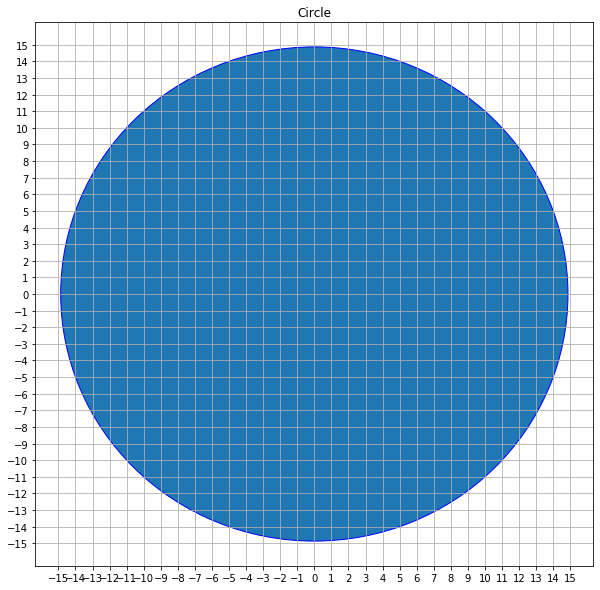

In [7]:
a=math.sqrt(2)
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as patches
def Circle(radius):
    plt.figure(figsize=(10,10))
    circle=plt.Circle((0,0),radius,color=None, edgecolor='blue',facecolor=None,linewidth='1')
    plt.gca().add_patch(circle)
    plt.plot()
    #plt.axis('axis')
    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(-int(radius)-1, int(radius)+2, 1)


    plt.xticks(major_ticks)
    plt.yticks(major_ticks)


    plt.title('Circle')
    plt.grid(which='both')
    plt.show()
def main():
    #radius=float(input('Enter the radius:'))
    radius=math.sqrt(17*13)
    Circle(float(radius))

main()

